In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape


(60000, 28, 28)

In [4]:
'''This means we have 60000 characters (or letters or categories) spanning across 30 different alphabets. 
  For each of this character, we have 20 images, and each image is a gray scale image of resolution 28x28.
  Hence the shape (60000, 28, 28).'''

'This means we have 60000 characters (or letters or categories) spanning across 30 different alphabets. \n  For each of this character, we have 20 images, and each image is a gray scale image of resolution 28x28.\n  Hence the shape (60000, 28, 28).'

In [5]:
y_train.shape

(60000,)

In [6]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [8]:
### Lets one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
## Declare the model
model = Sequential()



In [10]:
## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')



In [11]:
## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [12]:
from keras.models import Sequential

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)


Epoch 1/4
1875/1875 [==============================] - 101s 53ms/step - loss: 2.2405 - accuracy: 0.6215 - val_loss: 0.1217 - val_accuracy: 0.9635
Epoch 2/4
1875/1875 [==============================] - 100s 54ms/step - loss: 0.3056 - accuracy: 0.9091 - val_loss: 0.0703 - val_accuracy: 0.9782
Epoch 3/4
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2171 - accuracy: 0.9352 - val_loss: 0.0815 - val_accuracy: 0.9743
Epoch 4/4
1875/1875 [==============================] - 112s 59ms/step - loss: 0.1805 - accuracy: 0.9481 - val_loss: 0.0512 - val_accuracy: 0.9849


In [15]:

example = X_train[2]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))



Prediction (Softmax) from the neural network:

 [[4.7334458e-12 1.2603385e-07 5.0326450e-09 1.5124334e-11 9.9995673e-01
  1.2862117e-09 3.6231168e-12 6.9592249e-07 3.8387562e-08 4.2387288e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]




--------- Prediction --------- 




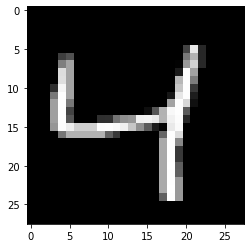



Final Output: 4


In [16]:
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [17]:
image = cv2.imread(r'C:\Users\welcome\Desktop\WhatsApp Image 2021-05-09 at 12.20.16 PM.jpeg')
#image1 = cv2.imread(r'C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates\date\test.jpeg')
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
#C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates
#gray = cv2.cvtColor(image1.copy(),cv2.COLOR_BGR2GRAY)





----------------Contoured Image--------------------


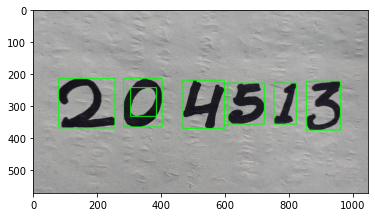

In [18]:

ret, thresh = cv2.threshold(gray.copy(), 75, 255, cv2.THRESH_BINARY_INV)
#_,contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []
    
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




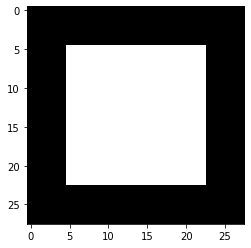



Final Output: 0

Prediction (Softmax) from the neural network:

 [[8.6373585e-01 3.4173449e-05 1.1863479e-03 6.7466652e-05 1.5575975e-03
  2.8521786e-04 1.2330264e-01 2.2493367e-04 6.4158631e-03 3.1898411e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




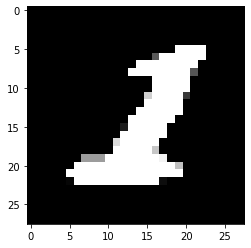



Final Output: 2

Prediction (Softmax) from the neural network:

 [[5.2137139e-09 3.8298030e-04 9.9822062e-01 1.1659400e-04 4.1102499e-10
  2.0459223e-09 1.4264953e-09 3.7728247e-04 9.0248772e-04 4.2771521e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




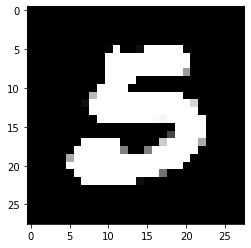



Final Output: 5

Prediction (Softmax) from the neural network:

 [[3.9811253e-05 1.6422407e-05 1.7470423e-04 1.4091331e-01 2.2475066e-07
  8.5471833e-01 6.3957012e-04 8.5039272e-07 2.9192527e-03 5.7761226e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




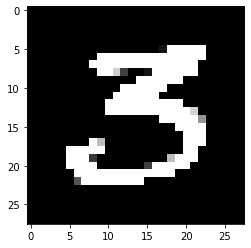



Final Output: 3

Prediction (Softmax) from the neural network:

 [[2.3232918e-13 1.7888782e-13 4.8294742e-09 9.9998939e-01 4.4951613e-18
  1.0621339e-05 2.9324771e-13 1.1584206e-11 9.0295149e-09 1.4553878e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




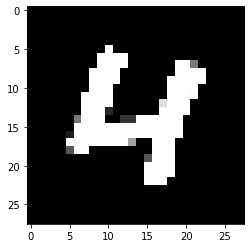



Final Output: 4

Prediction (Softmax) from the neural network:

 [[4.23568990e-15 8.38690662e-13 3.64582056e-14 2.23665323e-16
  9.99999881e-01 1.05477604e-13 8.21562260e-14 2.64912758e-10
  1.58957658e-09 7.73710624e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




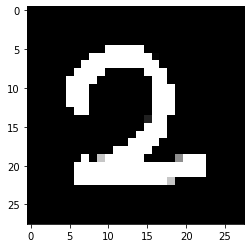



Final Output: 2

Prediction (Softmax) from the neural network:

 [[1.1763917e-07 1.9416204e-03 9.9780875e-01 2.2284534e-05 1.7728382e-08
  1.9507098e-08 1.9647790e-09 2.2477303e-04 2.5247675e-06 2.3245056e-08]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




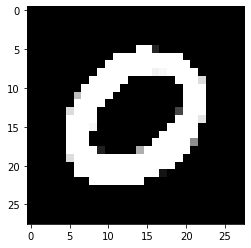



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 7.9994996e-17 4.1870962e-10 6.3323552e-12 4.4330596e-15
  1.8431384e-14 3.9938903e-11 1.3468027e-11 1.8846201e-11 3.5732494e-08]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




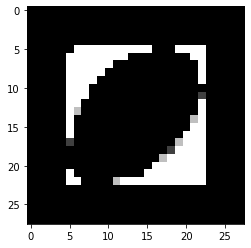



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0.0214994  0.0602503  0.02618172 0.09920612 0.05768441 0.49509695
  0.00247744 0.13963087 0.0173427  0.0806301 ]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [19]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))   
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

In [20]:
from PIL import Image
import imagehash
from tensorflow.keras.layers import Conv2D


In [21]:
# Load sample images (is it similar or not)
hash0 = imagehash.average_hash(Image.open(r'C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates\date\test.jpeg')) 
hash1 = imagehash.average_hash(Image.open(r'C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates\date\train.jpeg')) 
cutoff = 10
if hash0 - hash1 < cutoff:
      print('images are similar')
else:
      print('images are not similar')
        

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sh\\Desktop\\RUN\\Aviskar company\\handwriten dates\\date\\test.jpeg'

In [ ]:
train = Image.open(r'C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates\date\train.jpeg')
test = Image.open(r'C:\Users\sh\Desktop\RUN\Aviskar company\handwriten dates\date\test.jpeg')

In [ ]:
train.size

In [ ]:
test.size

In [ ]:
array_1= np.array(test)
array_d = np.array(train)

In [ ]:
array_d.shape

In [ ]:
# Reshaping so as to convert images for our model
X_train = array_1#( X_train.reshape(1040, 28, 28))
y_test = array_d#(X_test.reshape(1040, 28, 28))

In [ ]:
X_train.mean()

In [ ]:
X_test.mean()

In [ ]:
final_data=(X_test,X_train)

In [ ]:
print(X_train[3])

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(y_train[0])

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
print(X_train[0])

plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
from scipy.spatial import distance




In [ ]:
d = distance.euclidean(X_train,X_train)
print("Euclidean distance: ", d)
